In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [2]:
#importing csv file
data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
#checking for the shape of the data
data.shape

(1000, 40)

There are 1000 rows and 40 columns in the dataset

In [4]:
#checking for the null method
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

All the columns has no null values only one column with complete null values so we can delete that column.

In [5]:
#checking for info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

All the columns has different dtypes

In [6]:
#dropping the nulls column
data.drop(columns=['_c39'],axis=1,inplace=True)

In [7]:
#checking for stats
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


The stats gives the information about numerical columns but not the categorical columns information.The data not seems to be normal there is lot of skewness in the data.

In [8]:
#seperating the categorical columns from the dataset
cat_col=[]
for cols in data.dtypes.index:
    if data.dtypes[cols]=='object':
        cat_col.append(cols)
print(cat_col)       

['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [9]:
#seperating the numerical columns from the dataset
num_col=[]
for cols in data.dtypes.index:
    if data.dtypes[cols]!='object':
        num_col.append(cols)
print(num_col)       

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [10]:
#dropping a column which is not required
data.drop(columns=['insured_hobbies'],axis=1,inplace=True)

In [11]:
#checking for the value counts for categorical columns

In [12]:
data.policy_state.value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [13]:
data.policy_csl.value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [14]:
data.insured_sex.value_counts()

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

In [15]:
data.insured_education_level.value_counts()

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

In [16]:
data.insured_occupation.value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

In [17]:
data.insured_relationship.value_counts()

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64

In [18]:
data.incident_type.value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [19]:
data.collision_type.value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [20]:
data.incident_severity.value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [21]:
data.authorities_contacted.value_counts()

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64

In [22]:
data.incident_state.value_counts()

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

In [23]:

data.incident_city.value_counts()

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64

In [24]:
data.property_damage.value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [25]:
data.police_report_available.value_counts()

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [26]:
data.auto_make.value_counts()

Saab          80
Suburu        80
Dodge         80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [27]:
data.auto_model.value_counts()

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
95                27
E400              27
F150              27
Grand Cherokee    25
93                25
Escape            24
Tahoe             24
Maxima            24
X5                23
Ultima            23
Civic             22
Highlander        22
Silverado         22
Fusion            21
Corolla           20
Impreza           20
ML350             20
TL                20
CRV               20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64

In [28]:
data.fraud_reported.value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [34]:
#There are some '?' in the data so lets fill them
data['collision_type']=data['collision_type'].replace(['?'],'Rear Collision')
data['property_damage']=data['property_damage'].replace(['?'],'NO')
data['police_report_available']=data['police_report_available'].replace(['?'],'NO')

### EDA

In [35]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000,22,2
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N,16,7,1991,22,2
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,5,1,2014,24,1
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,17,2,2003,23,1
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,18,11,2011,26,2


In [36]:
data['policy_bind_day']=pd.to_datetime(data['policy_bind_date'],format="%d-%m-%Y").dt.day
data['policy_bind_month']=pd.to_datetime(data['policy_bind_date'],format="%d-%m-%Y").dt.month
data['policy_bind_year']=pd.to_datetime(data['policy_bind_date'],format="%d-%m-%Y").dt.year

In [37]:
data['incident_day']=pd.to_datetime(data['incident_date'],format="%d-%m-%Y").dt.day
data['incident_month']=pd.to_datetime(data['incident_date'],format="%d-%m-%Y").dt.month

In [38]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000,22,2
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,unmarried,0,0,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N,16,7,1991,22,2
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,wife,70900,0,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,5,1,2014,24,1
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,other-relative,35100,0,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,17,2,2003,23,1
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,wife,0,0,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,18,11,2011,26,2


In [39]:
s=data['policy_csl'].str.split('/',expand=True)


In [40]:
s.columns=['policy_public','policy_passenger']
df=s
df

,policy_public,policy_passenger
0,250,500
1,250,500
2,100,300
3,250,500
4,500,1000
...,...,...
995,500,1000
996,100,300
997,250,500
998,500,1000


In [41]:
data=pd.concat([data,df],axis=1)

In [42]:
data.drop(columns=['policy_csl','policy_bind_date','incident_date'],axis=1,inplace=True)

In [43]:
data

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_public,policy_passenger
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1,250,500
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1,250,500
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000,22,2,100,300
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,250,500
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N,16,7,1991,22,2,500,1000
996,285,41,186934,IL,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,5,1,2014,24,1,100,300
997,130,34,918516,OH,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,17,2,2003,23,1,250,500
998,458,62,533940,IL,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,18,11,2011,26,2,500,1000


<AxesSubplot:xlabel='policy_state', ylabel='count'>

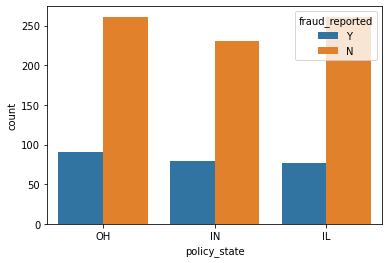

In [44]:
#plotting the countplots for categorical columns
sns.countplot(data['policy_state'],hue='fraud_reported',data=data)

The types of policies claimed by the customers are almost uniquely same with OH and IL type comapred to them IN is less claimed and most of them are not frauds among them 10% of them are reported as frauds.

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

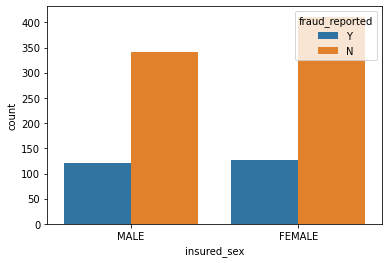

In [45]:
sns.countplot(data['insured_sex'],hue='fraud_reported',data=data)

Many of the female and male who claimed are not frauds only 120 members among them are reported as frauds.

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

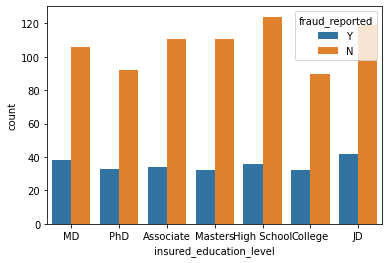

In [46]:
sns.countplot(data['insured_education_level'],hue='fraud_reported',data=data)

The people who done there High school and JD many of them from that education levels are reported as not frauds.

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

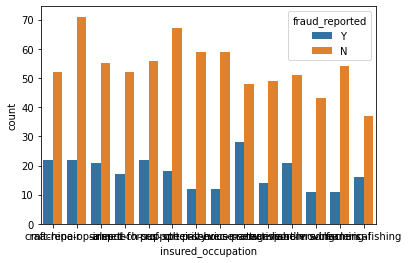

In [47]:
sns.countplot(data['insured_occupation'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='insured_relationship', ylabel='count'>

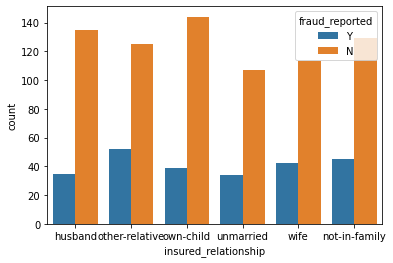

In [48]:
sns.countplot(data['insured_relationship'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='incident_type', ylabel='count'>

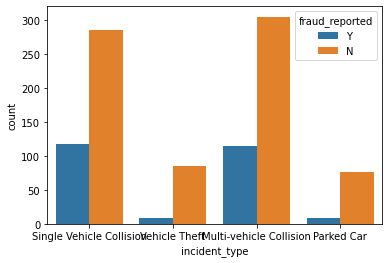

In [49]:
sns.countplot(data['incident_type'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

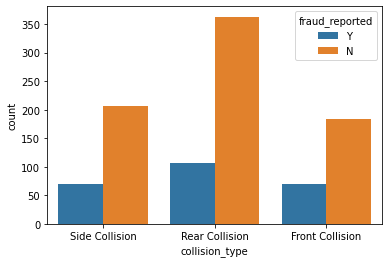

In [45]:
sns.countplot(data['collision_type'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

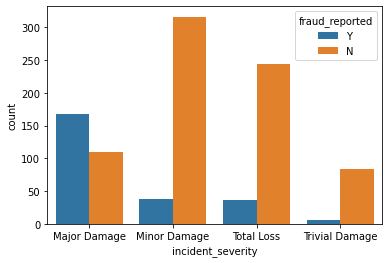

In [46]:
sns.countplot(data['incident_severity'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

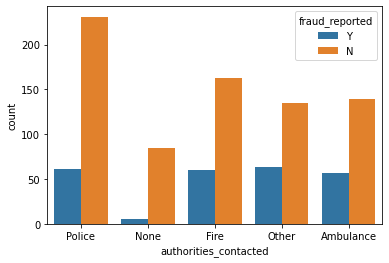

In [47]:
sns.countplot(data['authorities_contacted'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='incident_state', ylabel='count'>

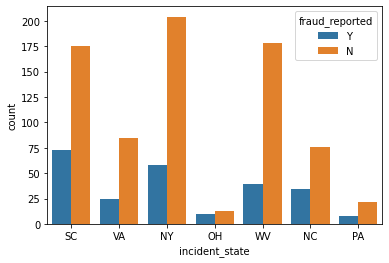

In [48]:
sns.countplot(data['incident_state'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

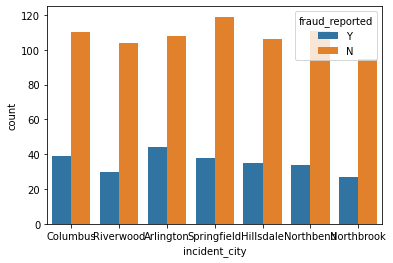

In [49]:
sns.countplot(data['incident_city'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='incident_location', ylabel='count'>

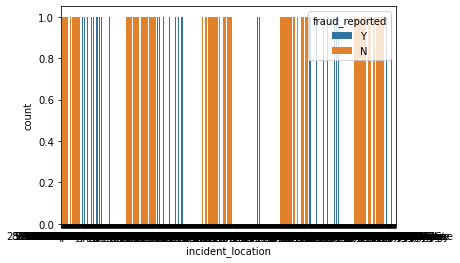

In [50]:
sns.countplot(data['incident_location'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

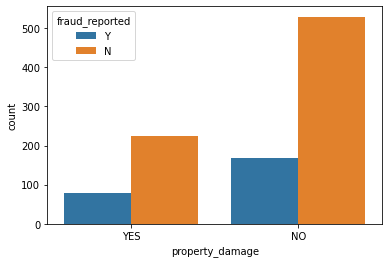

In [51]:
sns.countplot(data['property_damage'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

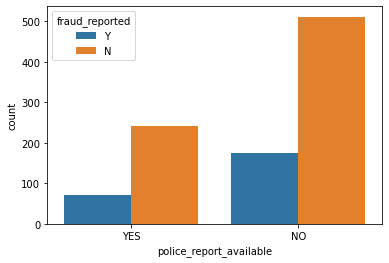

In [52]:
sns.countplot(data['police_report_available'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

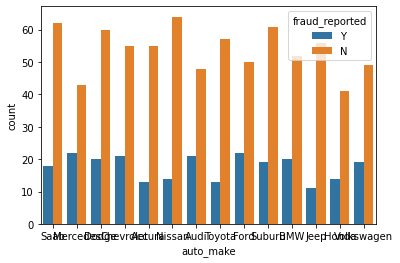

In [53]:
sns.countplot(data['auto_make'],hue='fraud_reported',data=data)

<AxesSubplot:xlabel='auto_model', ylabel='count'>

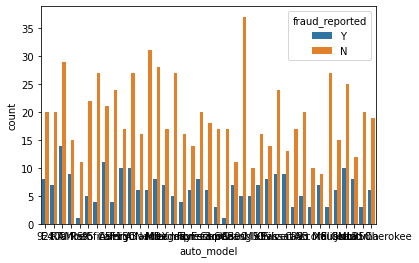

In [54]:
sns.countplot(data['auto_model'],hue='fraud_reported',data=data)

In [50]:
cat_col

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

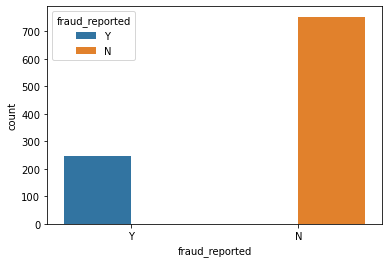

In [51]:
sns.countplot(data['fraud_reported'],hue='fraud_reported',data=data)

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

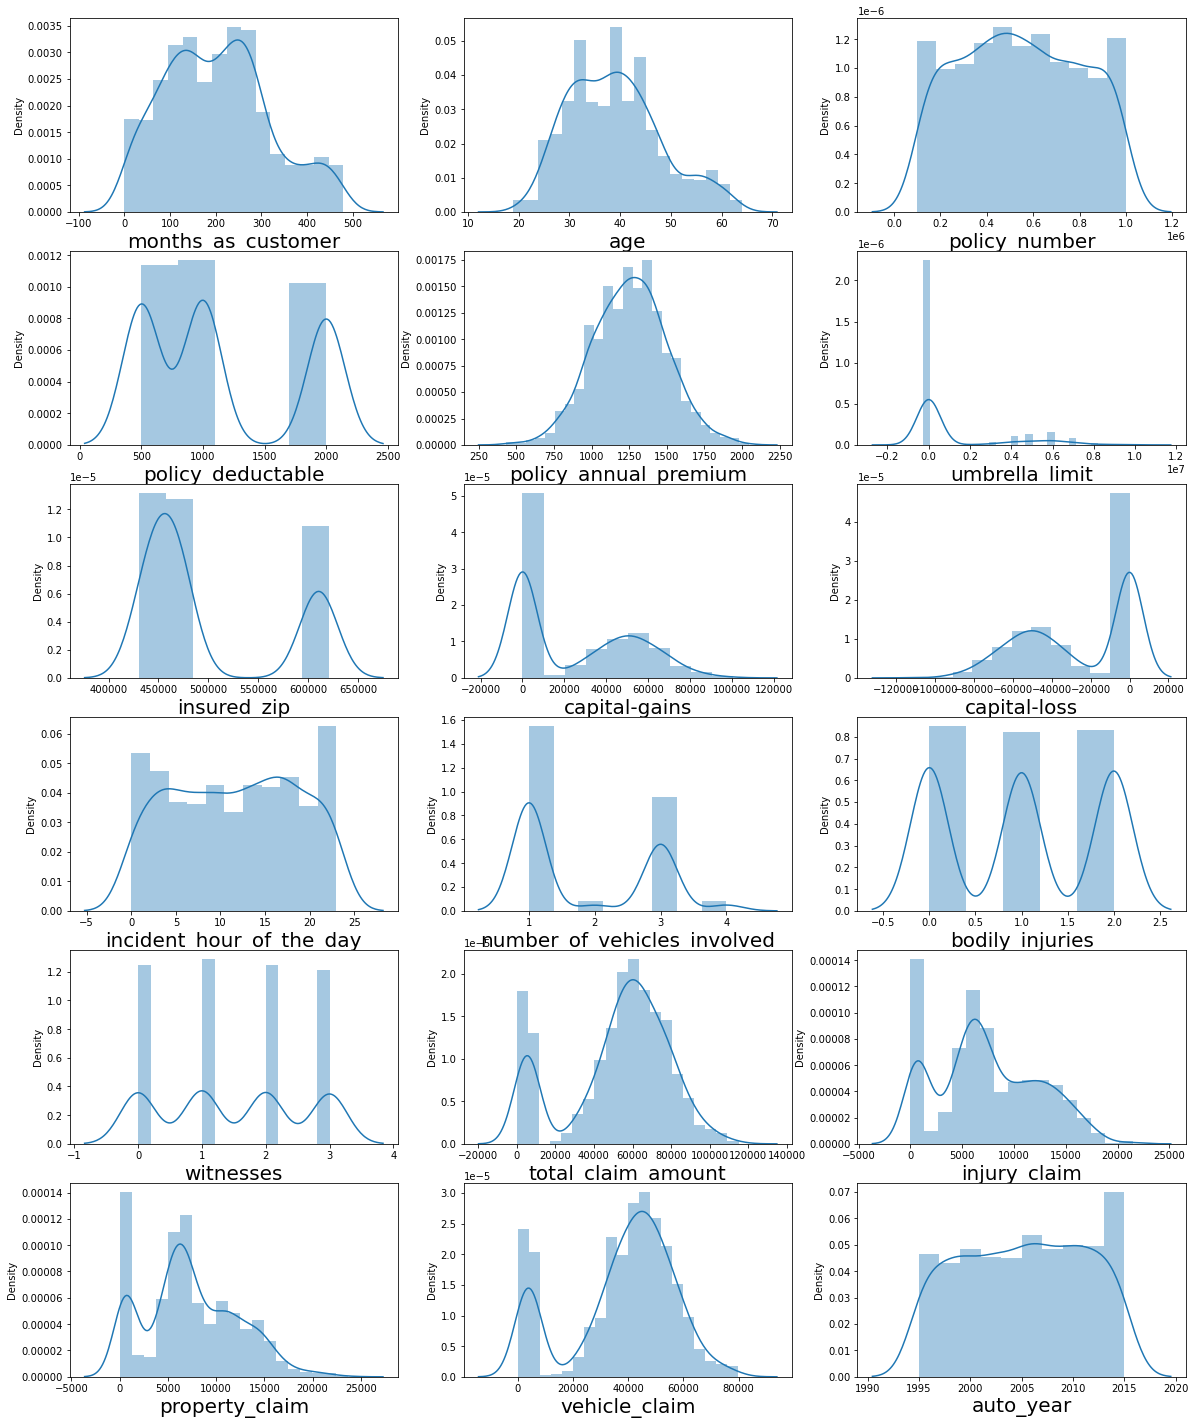

In [52]:
#Plotting the box plot to check the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout

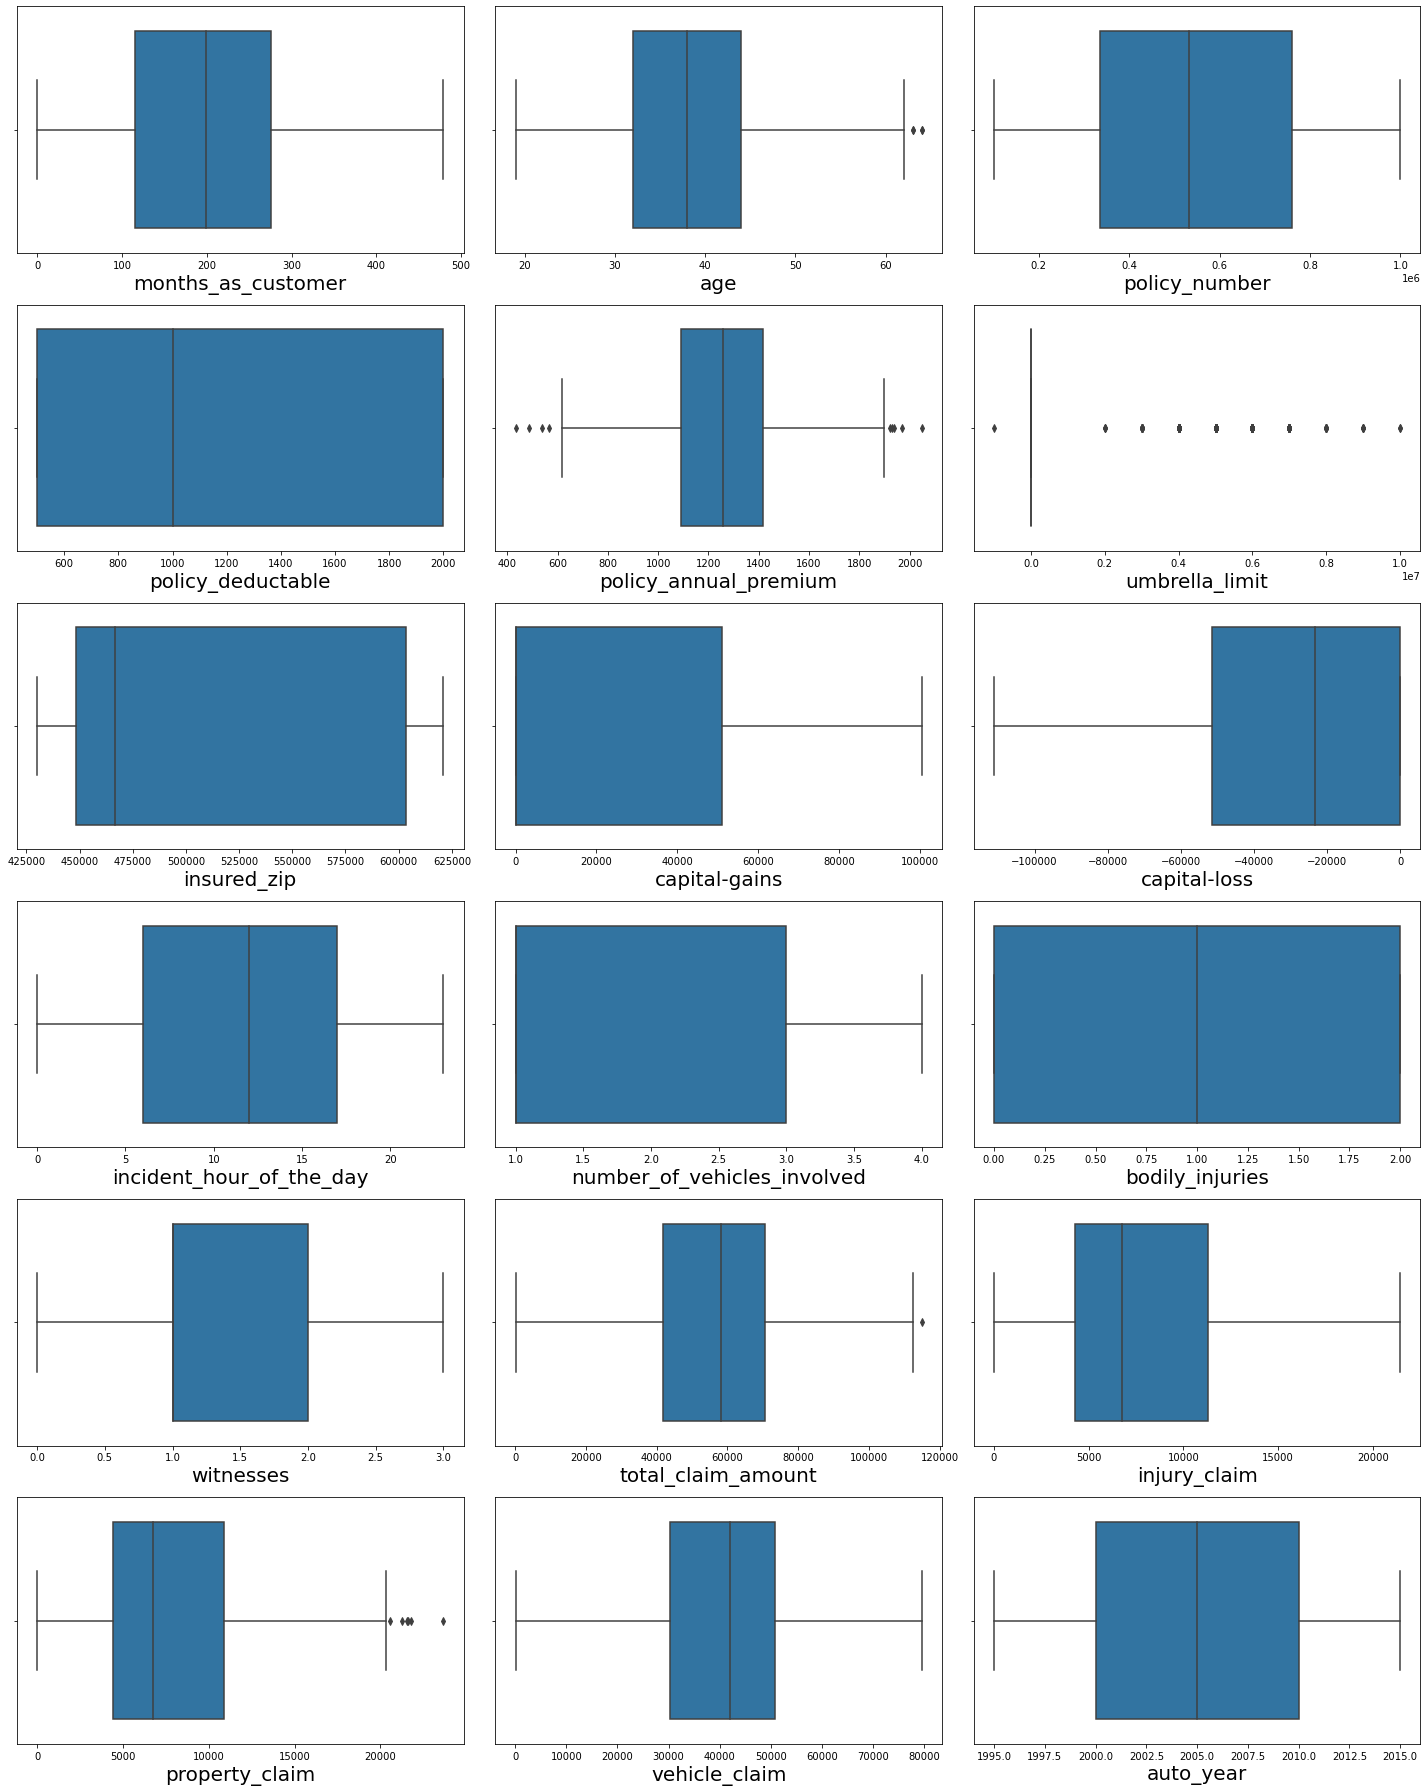

In [53]:
#Plotting the box plot to check the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [54]:
#Applying Z score method to remove outliers
#importing the stats from the scipy library
from scipy import stats
#lets remove outiers using z_score
z=np.abs(stats.zscore(data[num_col]))#abs=absolute numberprint(z)
print(z)

[[1.07813958 0.99083647 0.09595307 ... 1.16550497 0.74965272 0.1834404 ]
 [0.2089946  0.33407345 0.79152739 ... 1.37269599 1.82334593 0.31549088]
 [0.60800168 1.08891308 0.55056594 ... 0.73607206 0.78556451 0.31549088]
 ...
 [0.64276748 0.54161057 1.44891961 ... 0.0208261  0.77190224 1.5139238 ]
 [2.20802805 2.52328351 0.04786687 ... 0.45197603 0.07357971 1.18130295]
 [2.19064515 2.3043625  0.03830297 ... 1.34366428 1.81434017 0.31549088]]


In [55]:
print('Row Numbers:',np.where(z>3)[0])

Row Numbers: [ 31  48  88 115 119 229 248 262 314 430 458 500 503 657 700 763 807 875
 922 975]


In [56]:
#dropping some of the data of rows which r having outliers
index=(np.where(z>3)[0])
data.drop(data.index[index])


,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_public,policy_passenger
0,328,48,521585,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,17,10,2014,25,1,250,500
1,228,42,342868,IN,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,2007,Y,27,6,2006,21,1,250,500
2,134,29,687698,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,6,9,2000,22,2,100,300
3,256,41,227811,IL,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,25,5,1990,10,1,250,500
4,228,44,367455,IL,1000,1583.91,6000000,610706,MALE,Associate,sales,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,6,6,2014,17,2,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,NO,87200,17440,8720,61040,Honda,Accord,2006,N,16,7,1991,22,2,500,1000
996,285,41,186934,IL,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,NO,108480,18080,18080,72320,Volkswagen,Passat,2015,N,5,1,2014,24,1,100,300
997,130,34,918516,OH,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,NO,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,17,2,2003,23,1,250,500
998,458,62,533940,IL,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,NO,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,18,11,2011,26,2,500,1000


In [57]:
#encoding
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
cat_col=['policy_state','insured_sex','insured_education_level','insured_occupation','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported']
for col in cat_col:
    data[col]=lab_enc.fit_transform(data[col])
data

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_public,policy_passenger
0,328,48,521585,2,1000,1406.91,0,466132,1,4,2,0,53300,0,2,2,0,4,4,1,996,5,1,1,1,2,1,71610,6510,13020,52080,10,1,2004,1,17,10,2014,25,1,250,500
1,228,42,342868,1,2000,1197.22,5000000,468176,1,4,6,2,0,0,3,1,1,4,5,5,628,8,1,0,0,0,0,5070,780,780,3510,8,12,2007,1,27,6,2006,21,1,250,500
2,134,29,687698,2,2000,1413.14,5000000,430632,0,6,11,3,35100,0,0,1,1,4,1,1,685,7,3,0,2,3,0,34650,7700,3850,23100,4,30,2007,0,6,9,2000,22,2,100,300
3,256,41,227811,0,2000,1415.74,6000000,608117,0,6,1,4,48900,-62400,2,0,0,4,2,0,669,5,1,0,1,2,0,63400,6340,6340,50720,3,34,2014,1,25,5,1990,10,1,250,500
4,228,44,367455,0,1000,1583.91,6000000,610706,1,0,11,4,66000,-46000,3,1,1,2,1,0,220,20,1,0,0,1,0,6500,1300,650,4550,0,31,2009,0,6,6,2014,17,2,500,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,1000,1310.80,0,431289,0,5,2,4,0,0,2,0,1,1,0,4,561,20,1,1,0,1,0,87200,17440,8720,61040,6,6,2006,0,16,7,1991,22,2,500,1000
996,285,41,186934,0,1000,1436.79,0,608177,0,6,9,5,70900,0,2,1,0,1,4,3,227,23,1,1,2,3,0,108480,18080,18080,72320,13,28,2015,0,5,1,2014,24,1,100,300
997,130,34,918516,2,500,1383.49,3000000,442797,0,5,1,2,35100,0,0,2,1,4,0,0,746,4,3,0,2,3,1,67500,7500,7500,52500,11,19,1996,0,17,2,2003,23,1,250,500
998,458,62,533940,0,2000,1356.92,5000000,441714,1,0,5,5,0,0,2,1,0,3,1,0,569,2,1,0,0,1,1,46980,5220,5220,36540,1,5,1998,0,18,11,2011,26,2,500,1000


In [58]:
data['policy_public']=data['policy_public'].astype(int)
data['policy_passenger']=data['policy_passenger'].astype(int)

In [59]:
#I feel all the columns of claimed amounts their sum gives total claim amount am dropping total cliam amount columns since all the addition gives that column
data.drop(columns=['policy_number','insured_education_level'],axis=1,inplace=True)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_zip                  1000 non-null   int64  
 7   insured_sex                  1000 non-null   int32  
 8   insured_occupation           1000 non-null   int32  
 9   insured_relationship         1000 non-null   int32  
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   int32  
 13  collision_type     

In [61]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728


The skewness should be in the range of -0.5 to 0.5 but in the columns some of the columns having skewness so lets use log transformation and try removing the skewness.

In [67]:
#Log Transformation
data['insured_zip']=np.log(1+data['insured_zip'])
data['property_damage']=np.log(1+data['property_damage'])
data['police_report_available']=np.log(1+data['police_report_available'])
data['vehicle_claim']=np.log(1+data['vehicle_claim'])
data['policy_passenger']=np.log(1+data['policy_passenger'])


<AxesSubplot:>

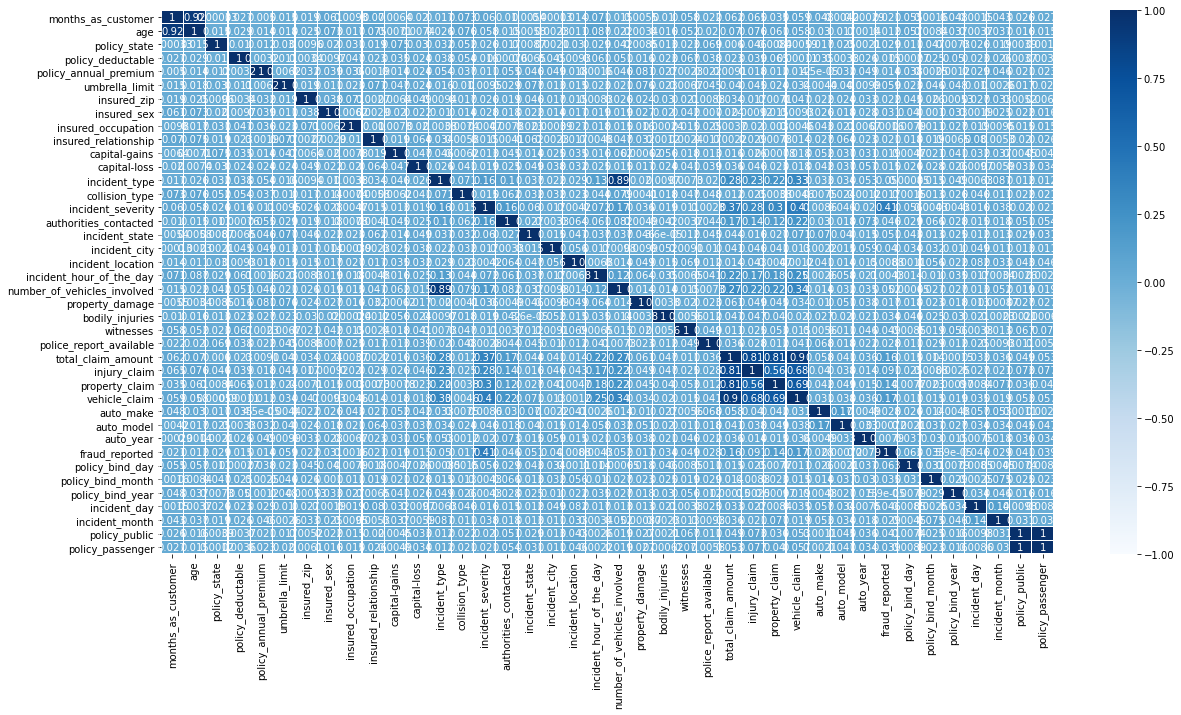

In [68]:
#Heatmap using correlation values
data_corr=data.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(data_corr,cmap='Blues',vmin=-1,vmax=1,annot=True,fmt='.2g',linewidth=0.1,center=0)

1.The Dark blues gives the highest correlation and light blue gives the less correlation.

2.total claim amount is highly correlated with different amount claims.No of vehicles involved is highly correlated with incident type.

3.policy pubic and policy passesenger are highly correlated.

In [120]:
data.shape

(1000, 40)

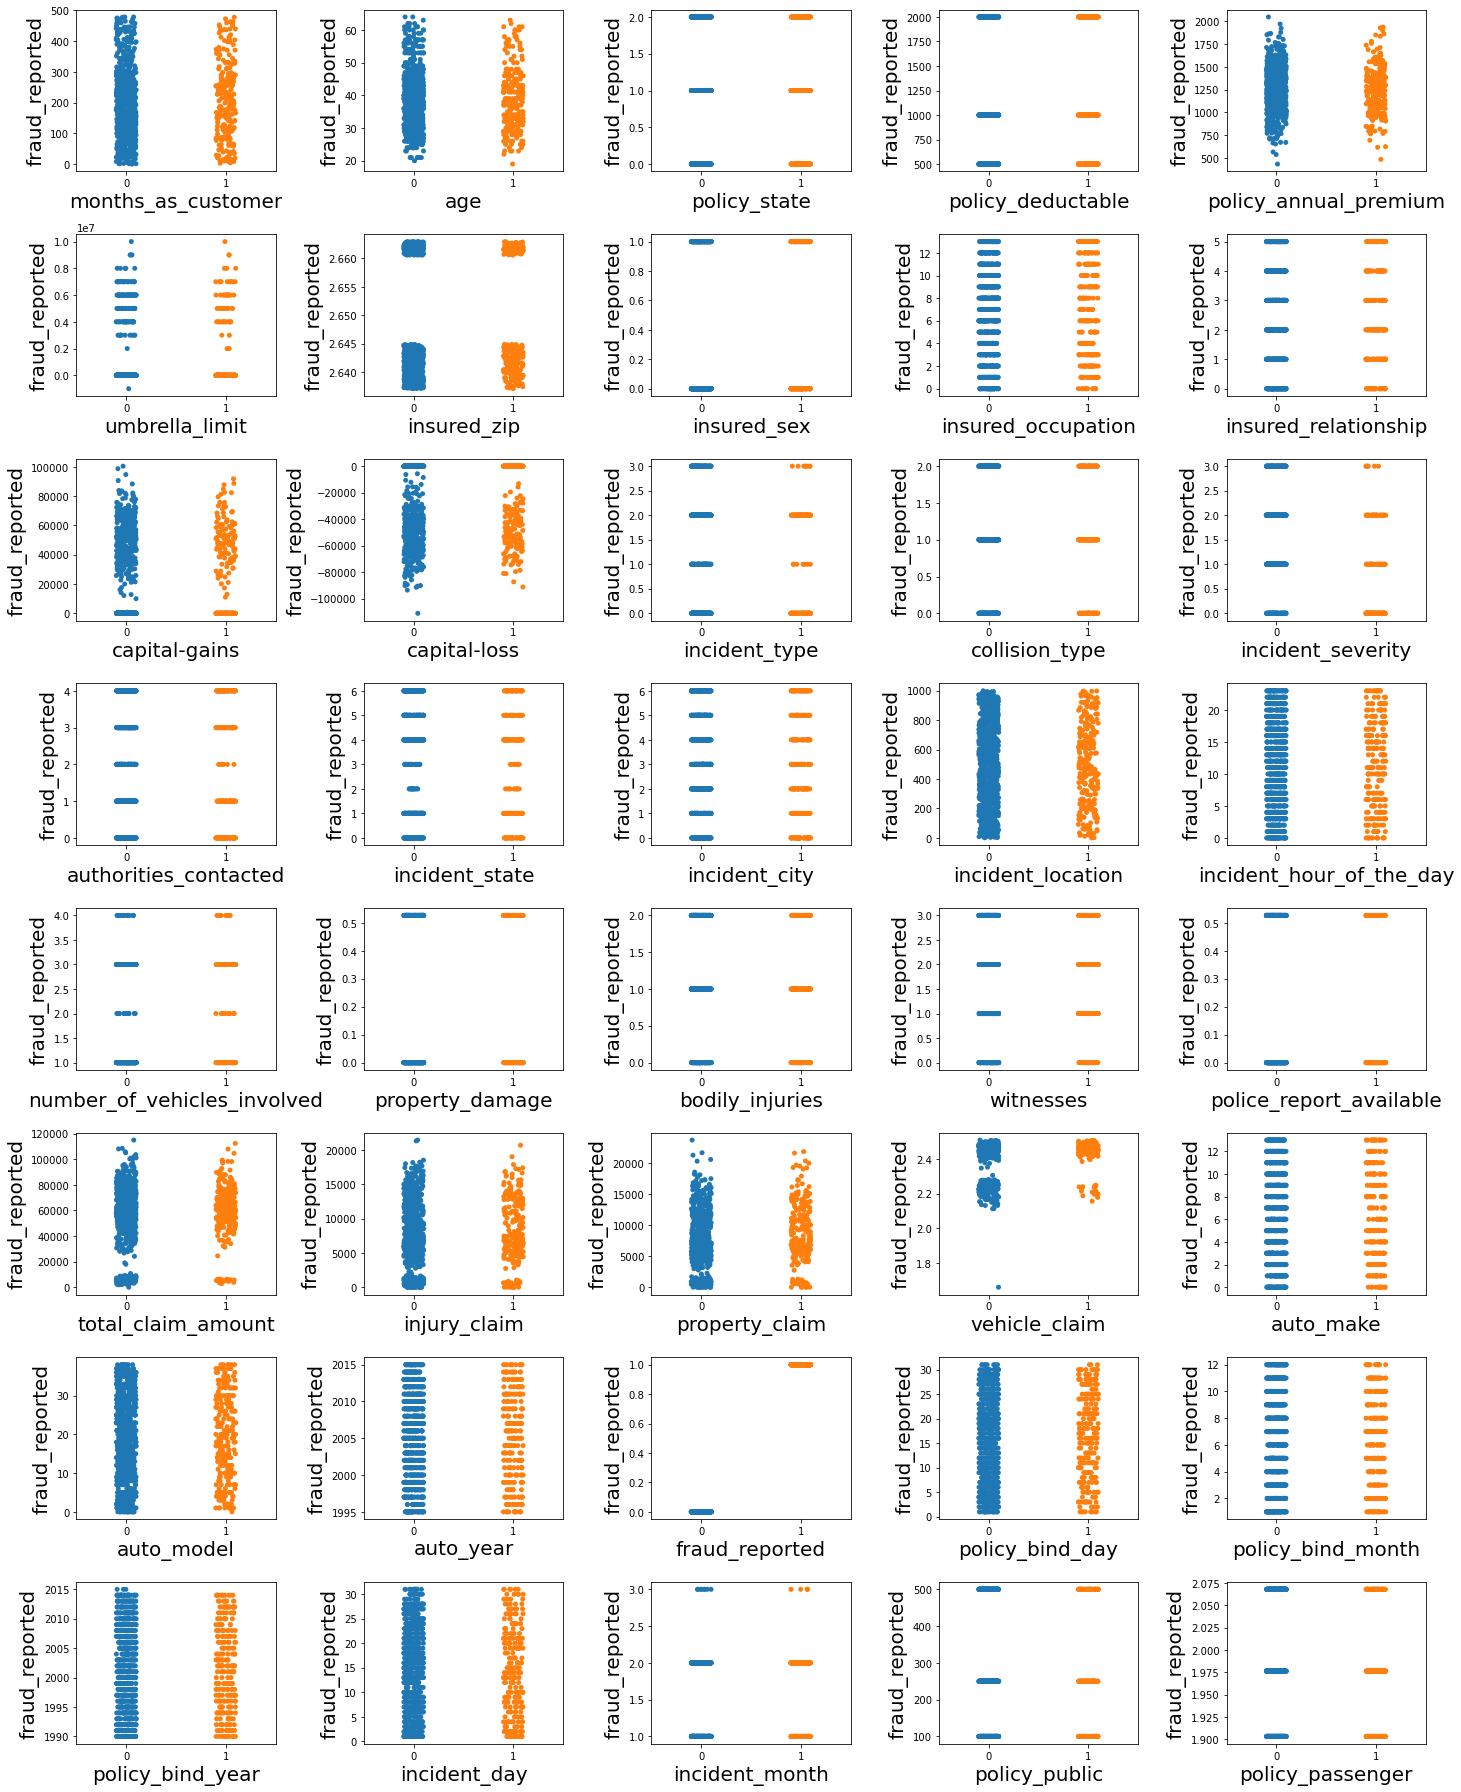

In [125]:
#ploting scatter plot 
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.stripplot(y,data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('fraud_reported',fontsize=20)
    plotnumber+=1
plt.tight_layout()

There is no much collinearity exists with labels and features.

In [83]:
#Lets split the data into features and label and store them in x and y variables
x=data.drop(['months_as_customer','fraud_reported'],axis=1)
y=data['fraud_reported']

In [84]:
#scailing the age and fare column because of the continous data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
feature_scale=['total_claim_amount','age','policy_deductable','capital-gains','capital-loss','policy_annual_premium','umbrella_limit','insured_zip','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','injury_claim','property_claim','vehicle_claim','auto_year','incident_location','policy_bind_day','policy_bind_month','policy_bind_year' ,'incident_day','incident_month','policy_public','policy_passenger']      
x[feature_scale]=scaler.fit_transform(x[feature_scale])
x

,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_occupation,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,policy_public,policy_passenger
0,0.990836,2,-0.222383,0.616705,-0.479476,-0.460075,1,2,0,1.011331,0.953851,2,2,0,4,4,1,1.719927,-0.956261,-0.823865,0.526589,0.009759,0.461838,0.526589,0.714257,-0.189283,1.165505,0.594214,10,1,-0.183440,0.176292,0.983684,1.684992,1.154424,-0.947587,-0.140228,-0.029046
1,0.334073,1,1.412784,-0.242521,1.697980,-0.427705,1,6,2,-0.901927,0.953851,3,1,1,4,5,5,0.445137,-0.524475,-0.823865,0.000000,-1.210174,-1.338700,0.000000,-1.807312,-1.363822,-1.372696,-2.059531,8,12,0.315491,1.312191,-0.159802,0.597550,0.692885,-0.947587,-0.140228,-0.029046
2,-1.088913,2,1.412784,0.642233,1.697980,-1.047856,0,11,3,0.358023,0.953851,0,1,1,4,1,1,0.642591,-0.668404,1.140056,0.000000,1.229693,1.362107,0.000000,-0.686362,0.054644,-0.736072,-0.136179,4,30,0.315491,-1.073198,0.697813,-0.218032,0.808270,0.962871,-1.068892,-1.134897
3,0.224613,0,1.412784,0.652886,2.133471,1.488965,0,1,4,0.853388,-1.267577,2,0,0,4,2,0,0.587166,-0.956261,-0.823865,0.000000,0.009759,0.461838,0.000000,0.403135,-0.224130,-0.219722,0.571239,3,34,1.479664,1.085011,-0.445674,-1.577335,-0.576347,-0.947587,-0.140228,-0.029046
4,0.552994,0,-0.222383,1.341980,2.133471,1.519811,1,11,4,1.467210,-0.683741,3,1,1,2,1,0,-0.968217,1.202666,-0.823865,0.000000,-1.210174,-0.438431,0.000000,-1.753121,-1.257232,-1.399654,-1.772329,0,31,0.648112,-1.073198,-0.159802,1.684992,0.231346,0.962871,1.407545,1.354247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.103769,2,-0.222383,0.222884,-0.479476,-1.036513,0,2,4,-0.901927,0.953851,2,0,1,1,0,4,0.213042,1.202666,-0.823865,0.526589,-1.210174,-0.438431,0.000000,1.305049,2.051155,0.273817,0.730984,6,6,0.149180,0.062702,0.126069,-1.441405,0.808270,0.962871,1.407545,1.354247
996,0.224613,0,-0.222383,0.739141,-0.479476,1.489681,0,9,5,1.643100,0.953851,2,1,0,1,4,3,-0.943968,1.634452,-0.823865,0.526589,1.229693,1.362107,0.000000,2.111466,2.182342,2.214794,0.875098,13,28,1.645974,-1.186788,-1.589160,1.684992,1.039039,-0.947587,-1.068892,-1.134897
997,-0.541611,2,-1.039966,0.520739,0.826998,-0.840772,0,1,2,0.358023,0.953851,0,2,1,4,0,0,0.853901,-1.100189,1.140056,0.000000,1.229693,1.362107,0.526589,0.558507,0.013648,0.020826,0.601178,11,19,-1.513924,0.176292,-1.303289,0.189759,0.923655,-0.947587,-0.140228,-0.029046
998,2.523284,0,1.412784,0.411866,1.697980,-0.858959,1,5,5,-0.901927,0.953851,2,1,0,3,1,0,0.240755,-1.388046,-0.823865,0.000000,-1.210174,-0.438431,0.526589,-0.219110,-0.453708,-0.451976,0.282181,1,5,-1.181303,0.289882,1.269556,1.277201,1.269809,0.962871,1.407545,1.354247


In [85]:
#lets use oversampling technique on minority class using smote method
#import smote from imblearn
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over=sm.fit_resample(x,y)
y_over.value_counts()


1    753
0    753
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

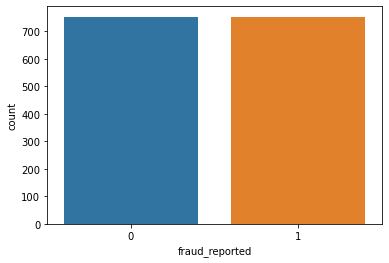

In [117]:
sns.countplot(y_over)

In [86]:
#splitting the dataset into train and test using train_test_split method
#importing train test split
from sklearn.model_selection import train_test_split
#dividing the x and y variables into train and test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.30,random_state=1)


In [87]:
#Importing some classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [88]:
#lets import some of the evaluation metrics for classification problem
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
#importing grid search cv for hyper parameter tuning and cross validation score for testing our model
from sklearn.model_selection import GridSearchCV,cross_val_score

### Logistic Regression

In [89]:
# Decision tree classifier
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

print('Classification Report for Logistic Regression: \n\n',classification_report(y_test,y_pred_lr))
print('Test Accuracy:{}%'.format(round(lr.score(x_test,y_test)*100,2)))
print('Cross validation score:',cross_val_score(lr,x_over,y_over,cv=5).mean()*100)
print('confusion matrix',confusion_matrix(y_test,y_pred_lr))

Classification Report for Logistic Regression: 

               precision    recall  f1-score   support

           0       0.78      0.74      0.76       235
           1       0.73      0.77      0.75       217

    accuracy                           0.76       452
   macro avg       0.76      0.76      0.76       452
weighted avg       0.76      0.76      0.76       452

Test Accuracy:75.66%
Cross validation score: 77.2286638357792
confusion matrix [[174  61]
 [ 49 168]]


### Decision Tree Classifier

In [90]:
# Decision tree classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)

print('Classification Report for Decision Tree Regressor: \n\n',classification_report(y_test,y_pred_dt))
print('Test Accuracy:{}%'.format(round(dt.score(x_test,y_test)*100,2)))
print('Cross validation score:',cross_val_score(dt,x_over,y_over,cv=5).mean()*100)
print('confusion matrix',confusion_matrix(y_test,y_pred_dt))

Classification Report for Decision Tree Regressor: 

               precision    recall  f1-score   support

           0       0.82      0.78      0.80       235
           1       0.77      0.82      0.79       217

    accuracy                           0.80       452
   macro avg       0.80      0.80      0.80       452
weighted avg       0.80      0.80      0.80       452

Test Accuracy:79.65%
Cross validation score: 75.57325471386768
confusion matrix [[183  52]
 [ 40 177]]


### KNeighbors Classifier

In [91]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

print('Classification Report for KNN Classifier: \n\n',classification_report(y_test,y_pred_knn))
print('Test Accuracy:{}%'.format(round(knn.score(x_test,y_test)*100,2)))
print('Cross validation score:',cross_val_score(knn,x_over,y_over,cv=5).mean()*100)
print('confusion matrix',confusion_matrix(y_test,y_pred_knn))

Classification Report for KNN Classifier: 

               precision    recall  f1-score   support

           0       0.95      0.40      0.56       235
           1       0.60      0.98      0.74       217

    accuracy                           0.68       452
   macro avg       0.78      0.69      0.65       452
weighted avg       0.78      0.68      0.65       452

Test Accuracy:67.7%
Cross validation score: 69.19187696640338
confusion matrix [[ 94 141]
 [  5 212]]


In [92]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print("Classification Report for Random Forest Classifier: \n\n",classification_report(y_test,y_pred_rf))
print("Test Accuracy:{}%".format(round(rf.score(x_test,y_test)*100,2)))
print('Cross validation score:',cross_val_score(rf,x_over,y_over,cv=5).mean()*100)
print('confusion matrix',confusion_matrix(y_test,y_pred_rf))

Classification Report for Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.87      0.88      0.87       235
           1       0.87      0.85      0.86       217

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452

Test Accuracy:86.73%
Cross validation score: 86.19810345206928
confusion matrix [[207  28]
 [ 32 185]]


### Support vector classifier

In [93]:
svm=SVC()
svm.fit(x_train,y_train)
y_pred_svm=svm.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred_svm))
print("Cross validation score:",np.mean(cross_val_score(svm,x_over,y_over,cv=5)))
print('Training score:',svm.score(x_train,y_train))
print('Testing score:',svm.score(x_test,y_test))
print('classification report',classification_report(y_test,y_pred_svm))
print('confusion matrix',confusion_matrix(y_test,y_pred_svm))

Accuracy Score: 0.7853982300884956
Cross validation score: 0.7769444016633298
Training score: 0.8130929791271347
Testing score: 0.7853982300884956
classification report               precision    recall  f1-score   support

           0       0.81      0.76      0.79       235
           1       0.76      0.81      0.78       217

    accuracy                           0.79       452
   macro avg       0.79      0.79      0.79       452
weighted avg       0.79      0.79      0.79       452

confusion matrix [[179  56]
 [ 41 176]]


### Hyper Parameter Tuning

In [94]:
param_grid={
    'max_depth':[5,6,7,8,10],
    'max_features':['auto','sqrt'],
    'n_estimators':[100,200,300],
    'criterion' :['gini','entropy']
}

In [95]:
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=10, n_jobs=-1) 
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 10],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [96]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200}

### Random Forest Classifier

In [99]:
Rf=RandomForestClassifier(criterion='gini',max_depth=10,max_features='sqrt',n_estimators=200)
Rf.fit(x_train,y_train)
y_pred_Rf=Rf.predict(x_test)
print("Classification Report for Random Forest Classifier: \n\n",classification_report(y_test,y_pred_Rf))
print("Test Accuracy:{}%".format(round(Rf.score(x_test,y_test)*100,2)))
print('Cross validation score:',cross_val_score(Rf,x_over,y_over,cv=5).mean()*100)
print('confusion matrix',confusion_matrix(y_test,y_pred_Rf))

Classification Report for Random Forest Classifier: 

               precision    recall  f1-score   support

           0       0.87      0.88      0.87       235
           1       0.87      0.86      0.86       217

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452

Test Accuracy:86.73%
Cross validation score: 86.66343974830036
confusion matrix [[206  29]
 [ 31 186]]


Even after hyper parameter tuning the accuracy score and cross validation scores are meeting 86%.So Our final model is Random Forest Classifier.

In [101]:
auc=roc_auc_score(y_test,y_pred_Rf)
auc

0.8668693009118542

In [102]:
#Ploting curve of ROC AUC 
fpr,tpr,thresholds=roc_curve(y_test,y_pred_rf)
fpr

array([0.        , 0.11914894, 1.        ])

In [103]:
tpr

array([0.        , 0.85253456, 1.        ])

In [104]:
thresholds

array([2, 1, 0])

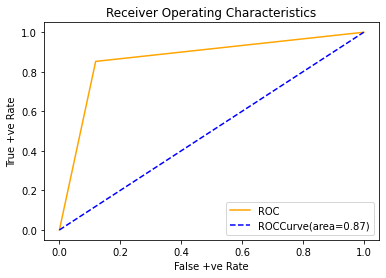

In [105]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='blue',linestyle='--',label='ROCCurve(area=%0.2f)'%auc)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='lower right')
plt.show()


The area under the curve for random forest occupied 87% of area.

### Final Model

In [110]:
final_model=RandomForestClassifier()
final_model.fit(x_train,y_train)
y_pred_Rf=final_model.predict(x_test)
print("Test Accuracy:{}%".format(round(final_model.score(x_test,y_test)*100,2)))
print('Cross validation score:',cross_val_score(final_model,x_over,y_over,cv=5).mean()*100)

Test Accuracy:86.06%
Cross validation score: 86.79633011374885


### Model Saving

In [111]:
import pickle
filename='Automobile Insurance Fraud Prediction.pkl'
pickle.dump(final_model,open(filename,'wb'))

In [112]:
a=np.array(y_test)
predicted=np.array(y_pred_Rf)
df=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
df

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
447,1,1
448,1,1
449,1,1
450,1,1


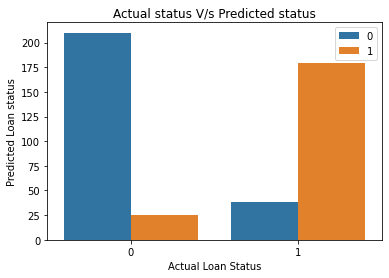

In [115]:
#Curve for actual and predicted value
sns.countplot(x=y_test,hue=y_pred_Rf)
plt.xlabel('Actual Loan Status')
plt.ylabel('Predicted Loan status')
plt.title('Actual status V/s Predicted status')
plt.show()

<AxesSubplot:ylabel='count'>

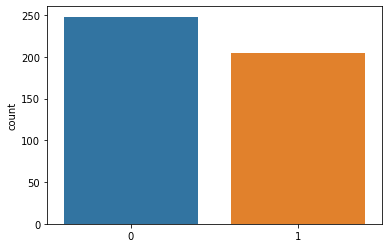

In [116]:
sns.countplot(y_pred_Rf)

In [126]:
print(y_pred_Rf[:20])
print(y_test[:20].values)

[0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 1]
[0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0]


We have got an accuracy of 86% with Random Forest Classifier for our dataset.